In [56]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import random
from networkx.algorithms import community
import numpy as np

In [2]:
# Read the bipartite graph B
pickleFile = '1%_Sample_author_genre_bipartite.gpickle'
with open(pickleFile,'rb') as f:
    B = pickle.load(f)

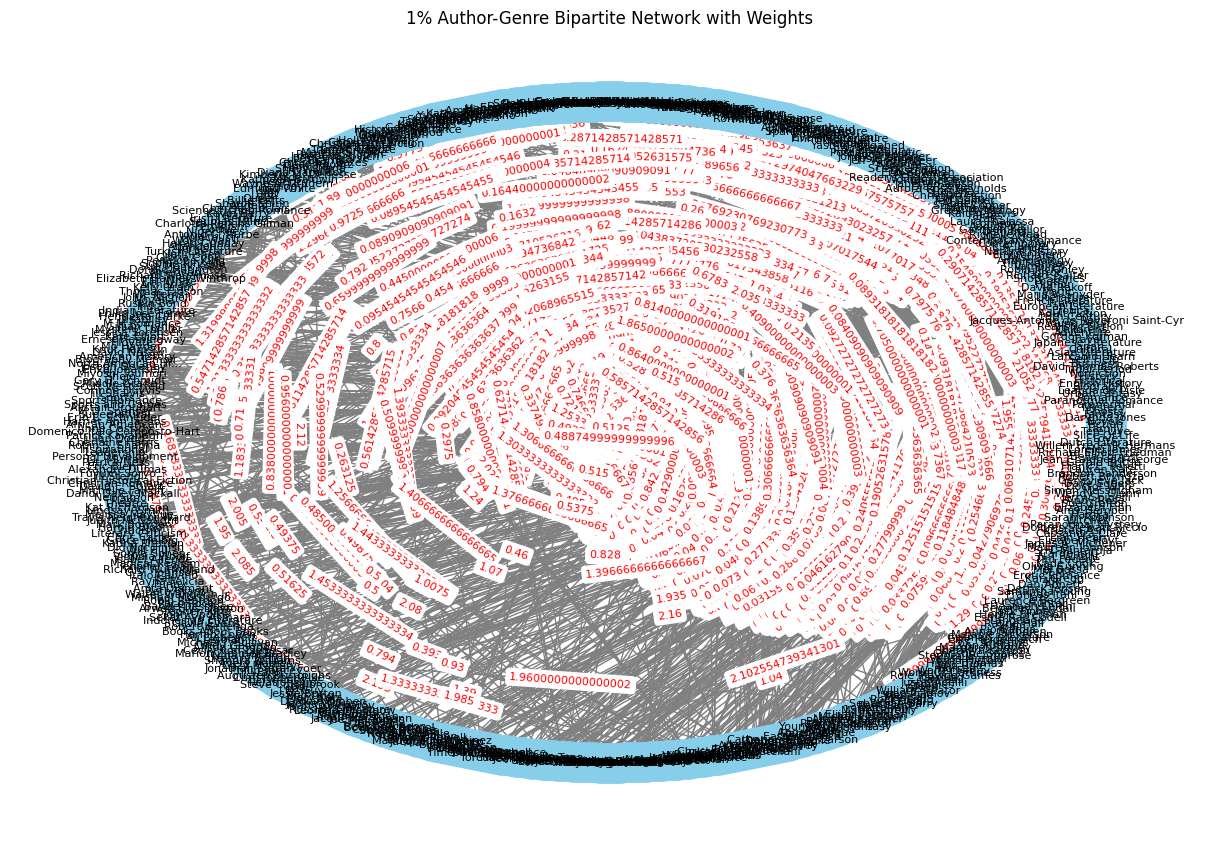

In [3]:
# Visualize the bipartite graph
pos = nx.circular_layout(B)

plt.figure(figsize=(12, 8))
nx.draw(B, pos, with_labels=True, font_size=8, font_color='black', node_color='skyblue', edge_color='gray', node_size=800)

# Display weights on edges (optional)
edge_labels = {(i, j): B[i][j]['weight'] for i, j in B.edges}
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.title("1% Author-Genre Bipartite Network with Weights")
plt.show()  


In [4]:
for edge in B.edges:
    print(edge, B.get_edge_data(edge[1],edge[0]))

genres = set()
authors = set()
for node in B.nodes.data('bipartite'):
    if node[1]==1:
        genres.add(node[0])
    else:
        authors.add(node[0])
print(sorted(genres))
print(len(genres))
print(authors)
print(len(authors))

# print(B.get_edge_data('Tere Liye','Mystery')==None)

# print(B.get_edge_data('Family','Tere Liye')['weight'])


('Tere Liye', 'Family') {'weight': 2.1213891804217155}
('Tere Liye', 'Fiction') {'weight': 0.04848889555249636}
('Tere Liye', 'Novels') {'weight': 0.6061111944062044}
('Tere Liye', 'Adult') {'weight': 0.21400000000000002}
('Tere Liye', 'Asian Literature') {'weight': 0.3057142857142857}
('Tere Liye', 'Drama') {'weight': 0.535}
('Tere Liye', 'Indonesian Literature') {'weight': 0.7133333333333334}
('Tere Liye', 'Literature') {'weight': 0.14266666666666666}
('Tere Liye', 'Love') {'weight': 2.14}
('Tere Liye', 'Realistic Fiction') {'weight': 0.16461538461538464}
('Tere Liye', 'Romance') {'weight': 0.018448275862068965}
('Tere Liye', 'Slice Of Life') {'weight': 2.14}
('Family', 'Hannah Richell') {'weight': 0.94}
('Family', 'Gloria Cook') {'weight': 1.1475}
('Fiction', 'Gordon Korman') {'weight': 0.021942857142857142}
('Fiction', 'Maria V. Snyder') {'weight': 0.025485714285714285}
('Fiction', 'David Rakoff') {'weight': 0.0224}
('Fiction', 'Robin McKinley') {'weight': 0.022000000000000002}
('F

346
Author: Mo Hayder, Degree Centrality: 0.6086956521739131, Associated Authors: 210
Author: Richelle Mead, Degree Centrality: 0.4985507246376812, Associated Authors: 172
Author: Cardeno C., Degree Centrality: 0.3652173913043478, Associated Authors: 126
Author: David E. Stuart, Degree Centrality: 0.15942028985507248, Associated Authors: 55
Author: Richard Elliott Friedman, Degree Centrality: 0.17101449275362318, Associated Authors: 59
Author: A. Drew, Degree Centrality: 0.3159420289855073, Associated Authors: 109
Author: Guy Gavriel Kay, Degree Centrality: 0.736231884057971, Associated Authors: 254
Author: Robert Hellenga, Degree Centrality: 0.5652173913043478, Associated Authors: 195
Author: Olivia Evans, Degree Centrality: 0.3855072463768116, Associated Authors: 133
Author: Richard  Salter, Degree Centrality: 0.31884057971014496, Associated Authors: 110
Author: Gillian Flynn, Degree Centrality: 0.5130434782608696, Associated Authors: 177
Author: Lee Child, Degree Centrality: 0.51304

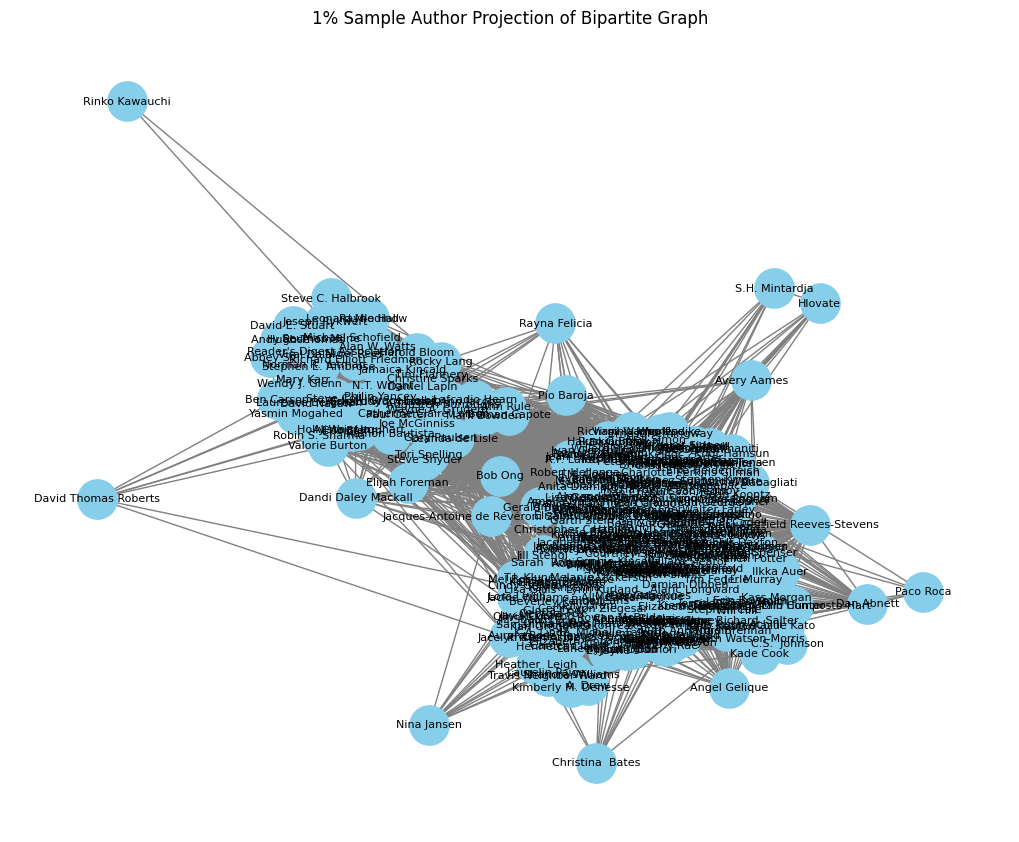

In [5]:
# Project the bipartite graph onto the set of authors
sample_author_projection= nx.bipartite.weighted_projected_graph(B, nodes=authors, ratio=False)

# Calculate degree centrality for authors
author_degree_centrality = nx.degree_centrality(sample_author_projection)

# Identify genres associated with authors
author_genre_associations = {author: list(sample_author_projection.neighbors(author)) for author in author_degree_centrality}

# Print degree centrality for authors and genres associated with each author
print(len(author_degree_centrality.items()))
for author, centrality in author_degree_centrality.items():
    print(f"Author: {author}, Degree Centrality: {centrality}, Associated Authors: {len(author_genre_associations[author])}")

# Optionally, visualize the projected graph
plt.figure(figsize=(10, 8))
nx.draw(sample_author_projection, with_labels=True, font_size=8, font_color='black', node_color='skyblue', edge_color='gray', node_size=800)
plt.title("1% Sample Author Projection of Bipartite Graph")
plt.show()


In [6]:
# Apply Louvain community detection algorithm
sample_louvain_author_communities = community.louvain_communities(sample_author_projection)
print(sample_louvain_author_communities)

[{'Harold Bloom', 'Stephen E. Ambrose', 'Alan W. Watts', 'Mary Karr', 'Ann Rule', 'Rinko Kawauchi', 'Philip Yancey', 'Lafcadio Hearn', 'Leonard Mlodinow', 'Eric Ludy', 'Richard Elliott Friedman', 'Bob Ong', 'Truman Capote', 'David E. Stuart', 'Leanda de Lisle', 'David Thomas Roberts', 'Eric Blehm', 'Mark Bowden', 'Hugh Thomas', 'Dandi Daley Mackall', 'Abbey Sy', 'Rayna Felicia', 'Wendy J. Glenn', 'Yasmin Mogahed', 'Ben Carson', 'N.T. Wright', 'Christine Sparks', 'Gary Paulsen', 'Grace Helbig', 'Ramon Bautista', 'Robin S. Sharma', 'Tim Flannery', 'Valorie Burton', 'Augusten Burroughs', "Reader's Digest Association", 'Harriet Ann Jacobs', 'Joe McGinniss', 'Rocky Lang', 'Seumas Milne', 'Joseph Rykwert', 'Laurence Bergreen', 'Paul Carter', 'Holly Wagner', 'Jamaica Kincaid', 'Alistair Urquhart', 'Daniel Lapin', 'Tori Spelling', 'Rayne Hall', 'Richard Wurmbrand', 'Viral Dalal', 'Michael Schofield', 'Nigel Rees', 'Wayne A. Grudem', 'Steve Snyder', 'Steve C. Halbrook', 'Catherine Claire Larson

In [7]:
# Load the dataset
dataset_path = "Processed_BookData.csv"
df = pd.read_csv(dataset_path)

# sample for testing
random.seed(74)  # for reproducibility
selected_rows = random.sample(range(len(df)), int(0.01 * len(df)))
df_sample = df.iloc[selected_rows]


In [8]:
for i in range(len(sample_louvain_author_communities)):
    print("Community", i+1, "-")
    comm_genres = set()
    # print(type(sample_louvain_author_communities[i]))
    for auth in sample_louvain_author_communities[i]:
        print(auth,end=", ")
        genres = set()
        for gList in df[df['book_authors']==auth]['genres']:
            for g in gList.split(","):
                genres.add(g)   
        # print(len(genres))
        if (len(comm_genres)==0):
            comm_genres = genres
        else:
            comm_genres = comm_genres.intersection(genres)
        # print(genres)
        # print(comm_genres)
    # print(comm_genres)
    # print(len(comm_genres))        
    print()
    print()

Community 1 -
Harold Bloom, Stephen E. Ambrose, Alan W. Watts, Mary Karr, Ann Rule, Rinko Kawauchi, Philip Yancey, Lafcadio Hearn, Leonard Mlodinow, Eric Ludy, Richard Elliott Friedman, Bob Ong, Truman Capote, David E. Stuart, Leanda de Lisle, David Thomas Roberts, Eric Blehm, Mark Bowden, Hugh Thomas, Dandi Daley Mackall, Abbey Sy, Rayna Felicia, Wendy J. Glenn, Yasmin Mogahed, Ben Carson, N.T. Wright, Christine Sparks, Gary Paulsen, Grace Helbig, Ramon Bautista, Robin S. Sharma, Tim Flannery, Valorie Burton, Augusten Burroughs, Reader's Digest Association, Harriet Ann Jacobs, Joe McGinniss, Rocky Lang, Seumas Milne, Joseph Rykwert, Laurence Bergreen, Paul Carter, Holly Wagner, Jamaica Kincaid, Alistair Urquhart, Daniel Lapin, Tori Spelling, Rayne Hall, Richard Wurmbrand, Viral Dalal, Michael Schofield, Nigel Rees, Wayne A. Grudem, Steve Snyder, Steve C. Halbrook, Catherine Claire Larson, David Nasaw, Steve Coll, Andy Rose, Norman R. Yetman, 

Community 2 -
Mo Hayder, Thomas Eidson, P

In [9]:
def getGenrelist(table,author):
    genreSeries = table[table['book_authors'] == author]['genres']
    genres = set()
    for index,values in genreSeries.items():
        for value in values.split(','):
            genres.add(value)
    return genres

In [10]:
# df_sample[df_sample['book_authors']=='Rainbow Rowell']

In [11]:
edges = sample_author_projection.edges
print(edges)
edge_weights = {}
for author1,author2 in edges:
    # print(author1,author2)
    genres1 = getGenrelist(df_sample,author1)
    genres2 = getGenrelist(df_sample,author2)
    common_genres = genres1.intersection(genres2)
    weightsSum = 0
    for genre in common_genres:
        weightsSum += B.get_edge_data(author1,genre)['weight'] * B.get_edge_data(author2,genre)['weight']
    mean_weight = weightsSum/len(common_genres)
    edge_weights[(author1,author2)] = mean_weight
    # print(common_genres)

[('Mo Hayder', 'Thomas Eidson'), ('Mo Hayder', 'Robert Bryndza'), ('Mo Hayder', 'Patrick Kavanagh'), ('Mo Hayder', 'Sue Grafton'), ('Mo Hayder', 'Hakan Günday'), ('Mo Hayder', 'Jennifer Egan'), ('Mo Hayder', 'Ernest Hemingway'), ('Mo Hayder', 'Ivan Goncharov'), ('Mo Hayder', 'R.S. Belcher'), ('Mo Hayder', 'Ann Rule'), ('Mo Hayder', 'Patricia St. John'), ('Mo Hayder', 'Sophie Kinsella'), ('Mo Hayder', 'Lafcadio Hearn'), ('Mo Hayder', 'Dean Koontz'), ('Mo Hayder', 'Michael Morpurgo'), ('Mo Hayder', 'Ray Bradbury'), ('Mo Hayder', 'Kurt Vonnegut'), ('Mo Hayder', 'Angel Gelique'), ('Mo Hayder', 'Georgia Fox'), ('Mo Hayder', 'Mark Bowden'), ('Mo Hayder', 'Justin Achilli'), ('Mo Hayder', 'Janet Evanovich'), ('Mo Hayder', 'Guy Gavriel Kay'), ('Mo Hayder', 'Robert Hellenga'), ('Mo Hayder', 'Derrick Jensen'), ('Mo Hayder', 'Sonya Sones'), ('Mo Hayder', 'Stephen Cole'), ('Mo Hayder', 'Ivy  Rose'), ('Mo Hayder', 'Gillian Flynn'), ('Mo Hayder', 'Stephen King'), ('Mo Hayder', 'Lee Child'), ('Mo Hayd

In [12]:
sample_louvain_author_communities

[{'Abbey Sy',
  'Alan W. Watts',
  'Alistair Urquhart',
  'Andy Rose',
  'Ann Rule',
  'Augusten Burroughs',
  'Ben Carson',
  'Bob Ong',
  'Catherine Claire Larson',
  'Christine Sparks',
  'Dandi Daley Mackall',
  'Daniel Lapin',
  'David E. Stuart',
  'David Nasaw',
  'David Thomas Roberts',
  'Eric Blehm',
  'Eric Ludy',
  'Gary Paulsen',
  'Grace Helbig',
  'Harold Bloom',
  'Harriet Ann Jacobs',
  'Holly Wagner',
  'Hugh Thomas',
  'Jamaica Kincaid',
  'Joe McGinniss',
  'Joseph Rykwert',
  'Lafcadio Hearn',
  'Laurence Bergreen',
  'Leanda de Lisle',
  'Leonard Mlodinow',
  'Mark Bowden',
  'Mary Karr',
  'Michael Schofield',
  'N.T. Wright',
  'Nigel Rees',
  'Norman R. Yetman',
  'Paul Carter',
  'Philip Yancey',
  'Ramon Bautista',
  'Rayna Felicia',
  'Rayne Hall',
  "Reader's Digest Association",
  'Richard Elliott Friedman',
  'Richard Wurmbrand',
  'Rinko Kawauchi',
  'Robin S. Sharma',
  'Rocky Lang',
  'Seumas Milne',
  'Stephen E. Ambrose',
  'Steve C. Halbrook',
  'St

In [23]:
len(sample_louvain_author_communities)

4

In [13]:
edge_weights

{('Mo Hayder', 'Thomas Eidson'): 0.004806676595799666,
 ('Mo Hayder', 'Robert Bryndza'): 0.00046336,
 ('Mo Hayder', 'Patrick Kavanagh'): 0.007971591875,
 ('Mo Hayder', 'Sue Grafton'): 0.01708251716244013,
 ('Mo Hayder', 'Hakan Günday'): 0.00803093375,
 ('Mo Hayder', 'Jennifer Egan'): 0.004282090063770769,
 ('Mo Hayder', 'Ernest Hemingway'): 0.00048,
 ('Mo Hayder', 'Ivan Goncharov'): 0.00826830125,
 ('Mo Hayder', 'R.S. Belcher'): 0.006842115251095415,
 ('Mo Hayder', 'Ann Rule'): 0.025957581323437538,
 ('Mo Hayder', 'Patricia St. John'): 0.004904274090130623,
 ('Mo Hayder', 'Sophie Kinsella'): 0.0004864,
 ('Mo Hayder', 'Lafcadio Hearn'): 0.9907772090517241,
 ('Mo Hayder', 'Dean Koontz'): 0.011352775551544703,
 ('Mo Hayder', 'Michael Morpurgo'): 0.005160467512749387,
 ('Mo Hayder', 'Ray Bradbury'): 0.007753475996326906,
 ('Mo Hayder', 'Kurt Vonnegut'): 0.0004940799999999999,
 ('Mo Hayder', 'Angel Gelique'): 0.014866483011937558,
 ('Mo Hayder', 'Georgia Fox'): 0.00524475201845444,
 ('Mo Ha

In [14]:
# Create the communities Network
C = nx.Graph()
C.add_nodes_from([node for community in sample_louvain_author_communities for node in community])
C.add_edges_from([(a, b, {'weight': edge_weights.get((a, b), 0.0)}) for a in C.nodes for b in C.nodes if a != b and edge_weights.get((a, b), 0.0) != 0.0])


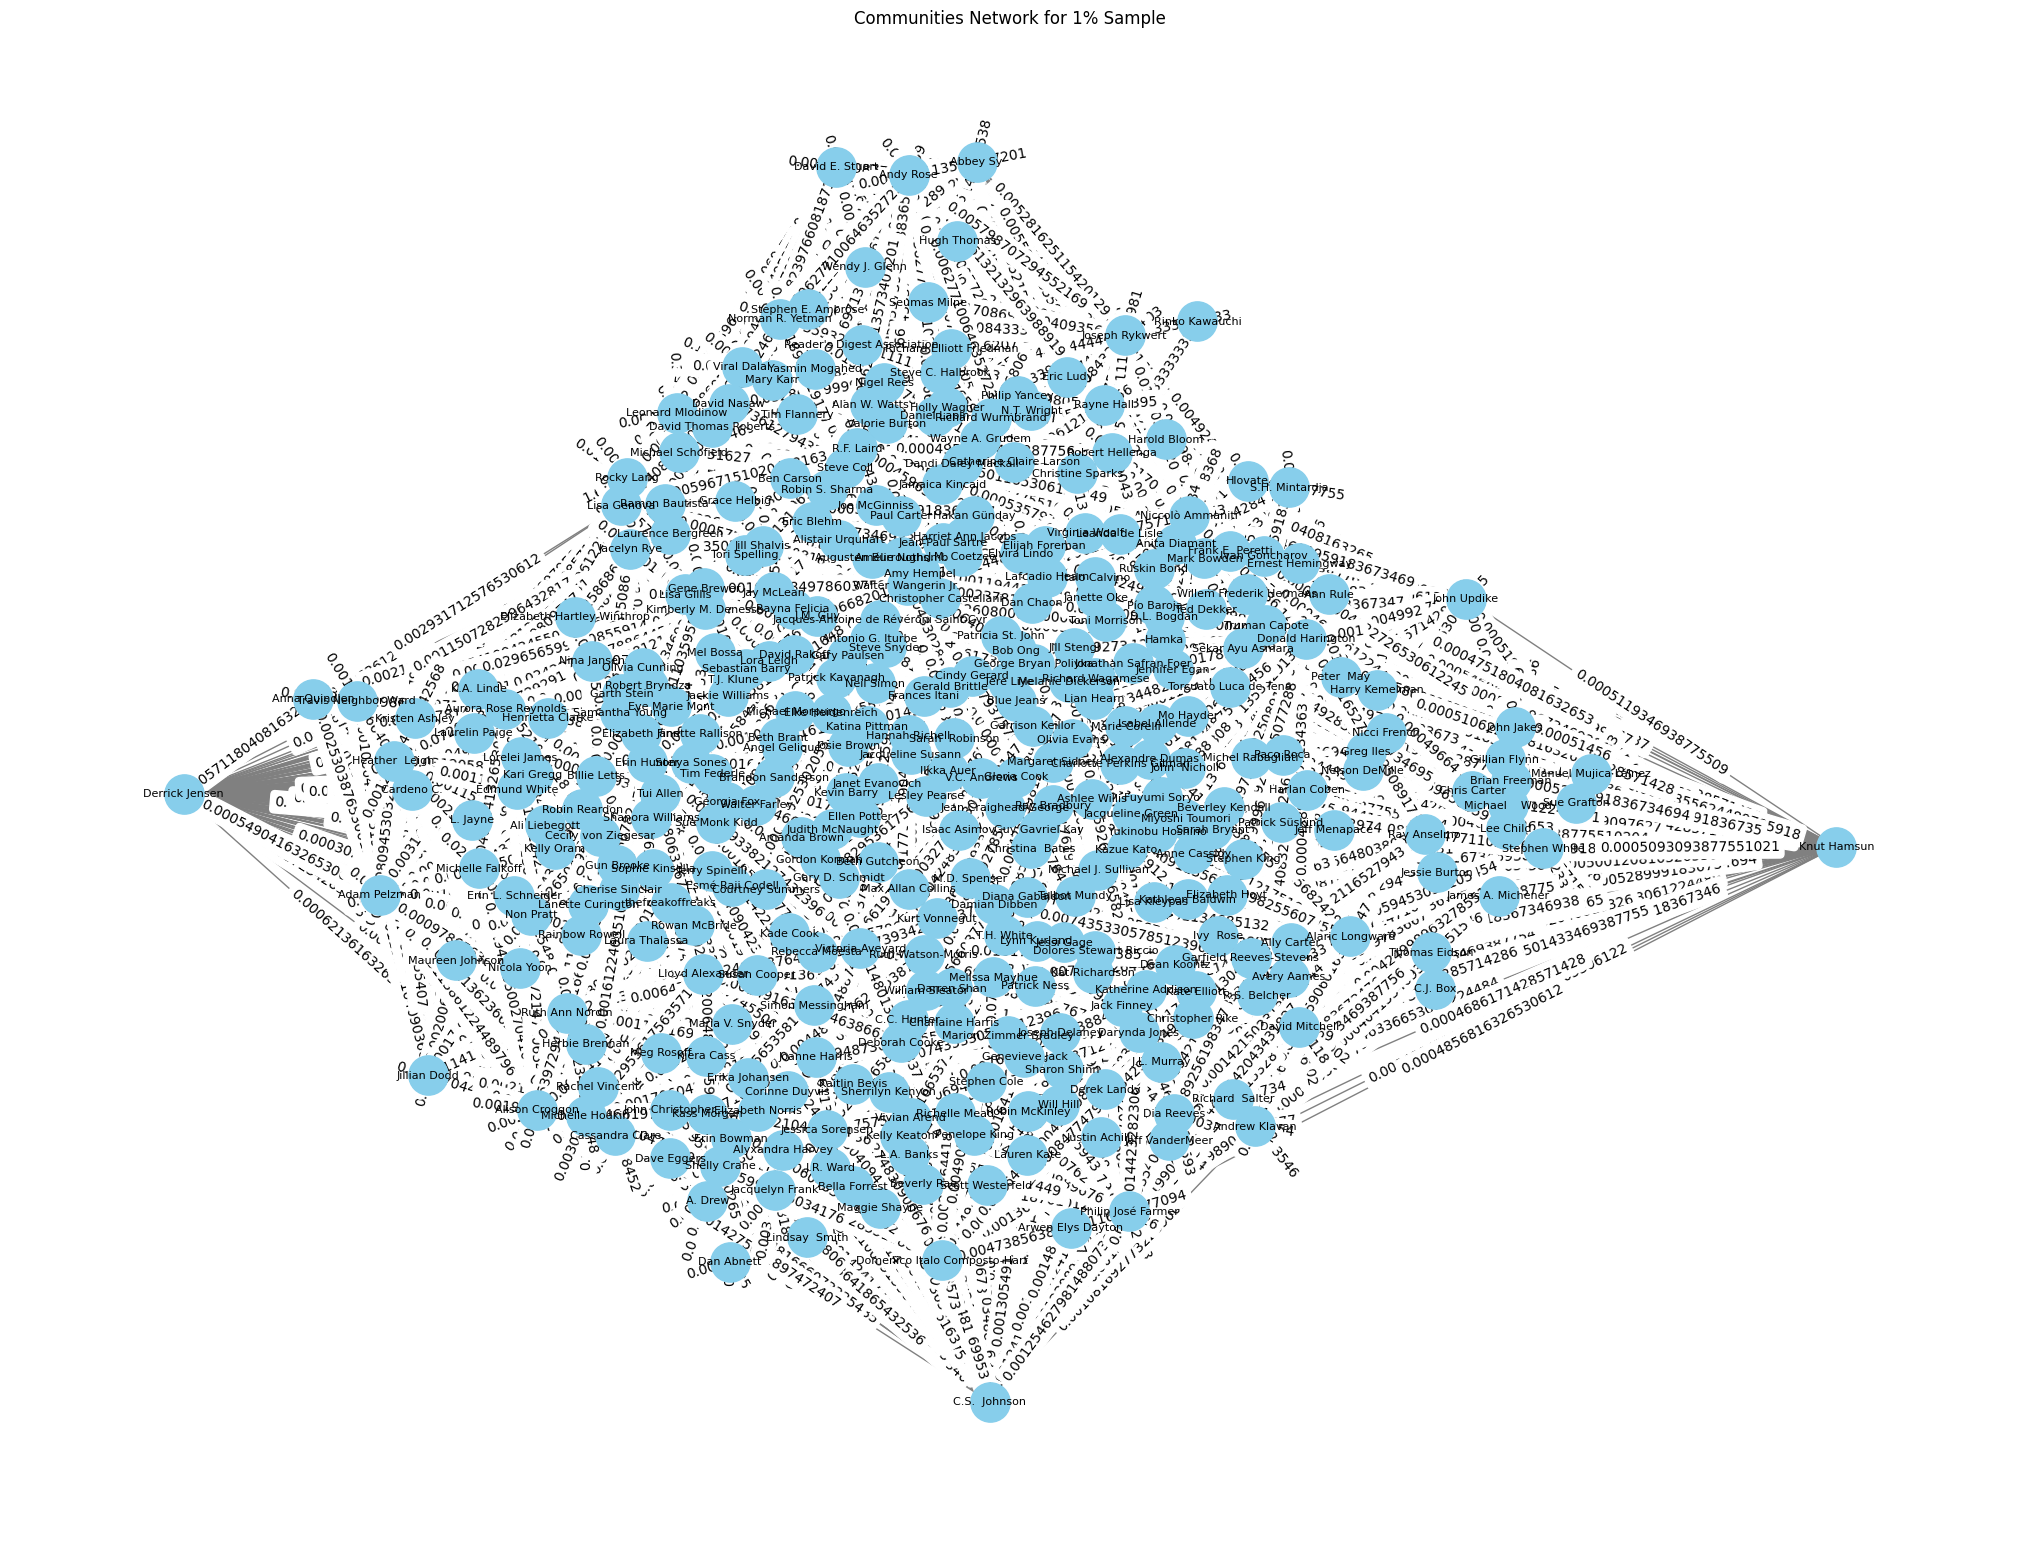

In [15]:
# Visualize communities Network
pos = nx.spring_layout(C)

# Set the size of the figure
plt.figure(figsize=(20, 15))  # Adjust the values (width, height) as needed
nx.draw(C, pos, with_labels=True, font_size=8, node_color='skyblue', edge_color='gray', node_size=800, font_color='black')

# Display edge weights
edge_labels = nx.get_edge_attributes(C, 'weight')
nx.draw_networkx_edge_labels(C, pos, edge_labels=edge_labels)

plt.title("Communities Network for 1% Sample")
plt.show()

In [17]:
C.edges

EdgeView([('Harold Bloom', 'Stephen E. Ambrose'), ('Harold Bloom', 'Alan W. Watts'), ('Harold Bloom', 'Leonard Mlodinow'), ('Harold Bloom', 'Bob Ong'), ('Harold Bloom', 'Truman Capote'), ('Harold Bloom', 'Leanda de Lisle'), ('Harold Bloom', 'Eric Blehm'), ('Harold Bloom', 'Mark Bowden'), ('Harold Bloom', 'Hugh Thomas'), ('Harold Bloom', 'Abbey Sy'), ('Harold Bloom', 'Wendy J. Glenn'), ('Harold Bloom', 'Ben Carson'), ('Harold Bloom', 'N.T. Wright'), ('Harold Bloom', 'Christine Sparks'), ('Harold Bloom', 'Gary Paulsen'), ('Harold Bloom', 'Grace Helbig'), ('Harold Bloom', 'Ramon Bautista'), ('Harold Bloom', 'Valorie Burton'), ('Harold Bloom', 'Augusten Burroughs'), ('Harold Bloom', "Reader's Digest Association"), ('Harold Bloom', 'Harriet Ann Jacobs'), ('Harold Bloom', 'Laurence Bergreen'), ('Harold Bloom', 'Paul Carter'), ('Harold Bloom', 'Holly Wagner'), ('Harold Bloom', 'Jamaica Kincaid'), ('Harold Bloom', 'Daniel Lapin'), ('Harold Bloom', 'Michael Schofield'), ('Harold Bloom', 'Nigel 

In [20]:
for edge1,edge2 in C.edges:
    print(edge1, ",", edge2, ":", C.get_edge_data(edge1,edge2)['weight'])

Harold Bloom , Stephen E. Ambrose : 0.01696701148430286
Harold Bloom , Alan W. Watts : 0.005171929824561401
Harold Bloom , Leonard Mlodinow : 0.004825484764542935
Harold Bloom , Bob Ong : 0.03753930193905816
Harold Bloom , Truman Capote : 0.005023453370267773
Harold Bloom , Leanda de Lisle : 0.016227529143582643
Harold Bloom , Eric Blehm : 0.018651387927054473
Harold Bloom , Mark Bowden : 0.0161864467913204
Harold Bloom , Hugh Thomas : 0.01758324676823638
Harold Bloom , Abbey Sy : 0.0053080332409972284
Harold Bloom , Wendy J. Glenn : 0.004949215143120959
Harold Bloom , Ben Carson : 0.005394644506001846
Harold Bloom , N.T. Wright : 0.0053451523545706365
Harold Bloom , Christine Sparks : 0.01622752914358264
Harold Bloom , Gary Paulsen : 0.005258541089566019
Harold Bloom , Grace Helbig : 0.004973961218836563
Harold Bloom , Ramon Bautista : 0.004825484764542935
Harold Bloom , Valorie Burton : 0.0051471837488457975
Harold Bloom , Augusten Burroughs : 0.004912096029547552
Harold Bloom , Read

In [29]:
data = []
for edge1, edge2 in C.edges:
    community_id = None
    for index, community in enumerate(sample_louvain_author_communities):
        if set((edge1,edge2)).issubset(community):
            community_id = index
            break
    
    data.append({
        "Author1" : edge1,
        "Author2" : edge2,
        "Author1-Author2 Link weight" : C.get_edge_data(edge1,edge2)['weight'],
        "Community ID" : community_id,
        "Common Genres" : getGenrelist(df_sample,edge1).intersection(getGenrelist(df_sample,edge2))
    })
    
communities_df = pd.DataFrame(data)

print(communities_df)

                       Author1                  Author2  \
0                 Harold Bloom       Stephen E. Ambrose   
1                 Harold Bloom            Alan W. Watts   
2                 Harold Bloom         Leonard Mlodinow   
3                 Harold Bloom                  Bob Ong   
4                 Harold Bloom            Truman Capote   
...                        ...                      ...   
27971            Damian Dibben            Deborah Cooke   
27972            Damian Dibben  Garfield Reeves-Stevens   
27973            Damian Dibben         Victoria Aveyard   
27974            Deborah Cooke         Victoria Aveyard   
27975  Garfield Reeves-Stevens         Victoria Aveyard   

       Author1-Author2 Link weight  Community ID  \
0                         0.016967           0.0   
1                         0.005172           0.0   
2                         0.004825           0.0   
3                         0.037539           0.0   
4                         0.005

In [30]:
communities_df.to_csv("Communities_1%_BookData.csv",index=False)

In [68]:
def hasCommunity(a,b):
    ans = communities_df.loc[(communities_df['Author1']==a)].loc[communities_df.loc[(communities_df['Author1']==a)]['Author2']==b]['Community ID'].values
    if (len(ans)==0):
        return np.nan
    else:
        return ans[0]

np.isnan(hasCommunity('Ruskin Bond','Charlaine Harris'))

True

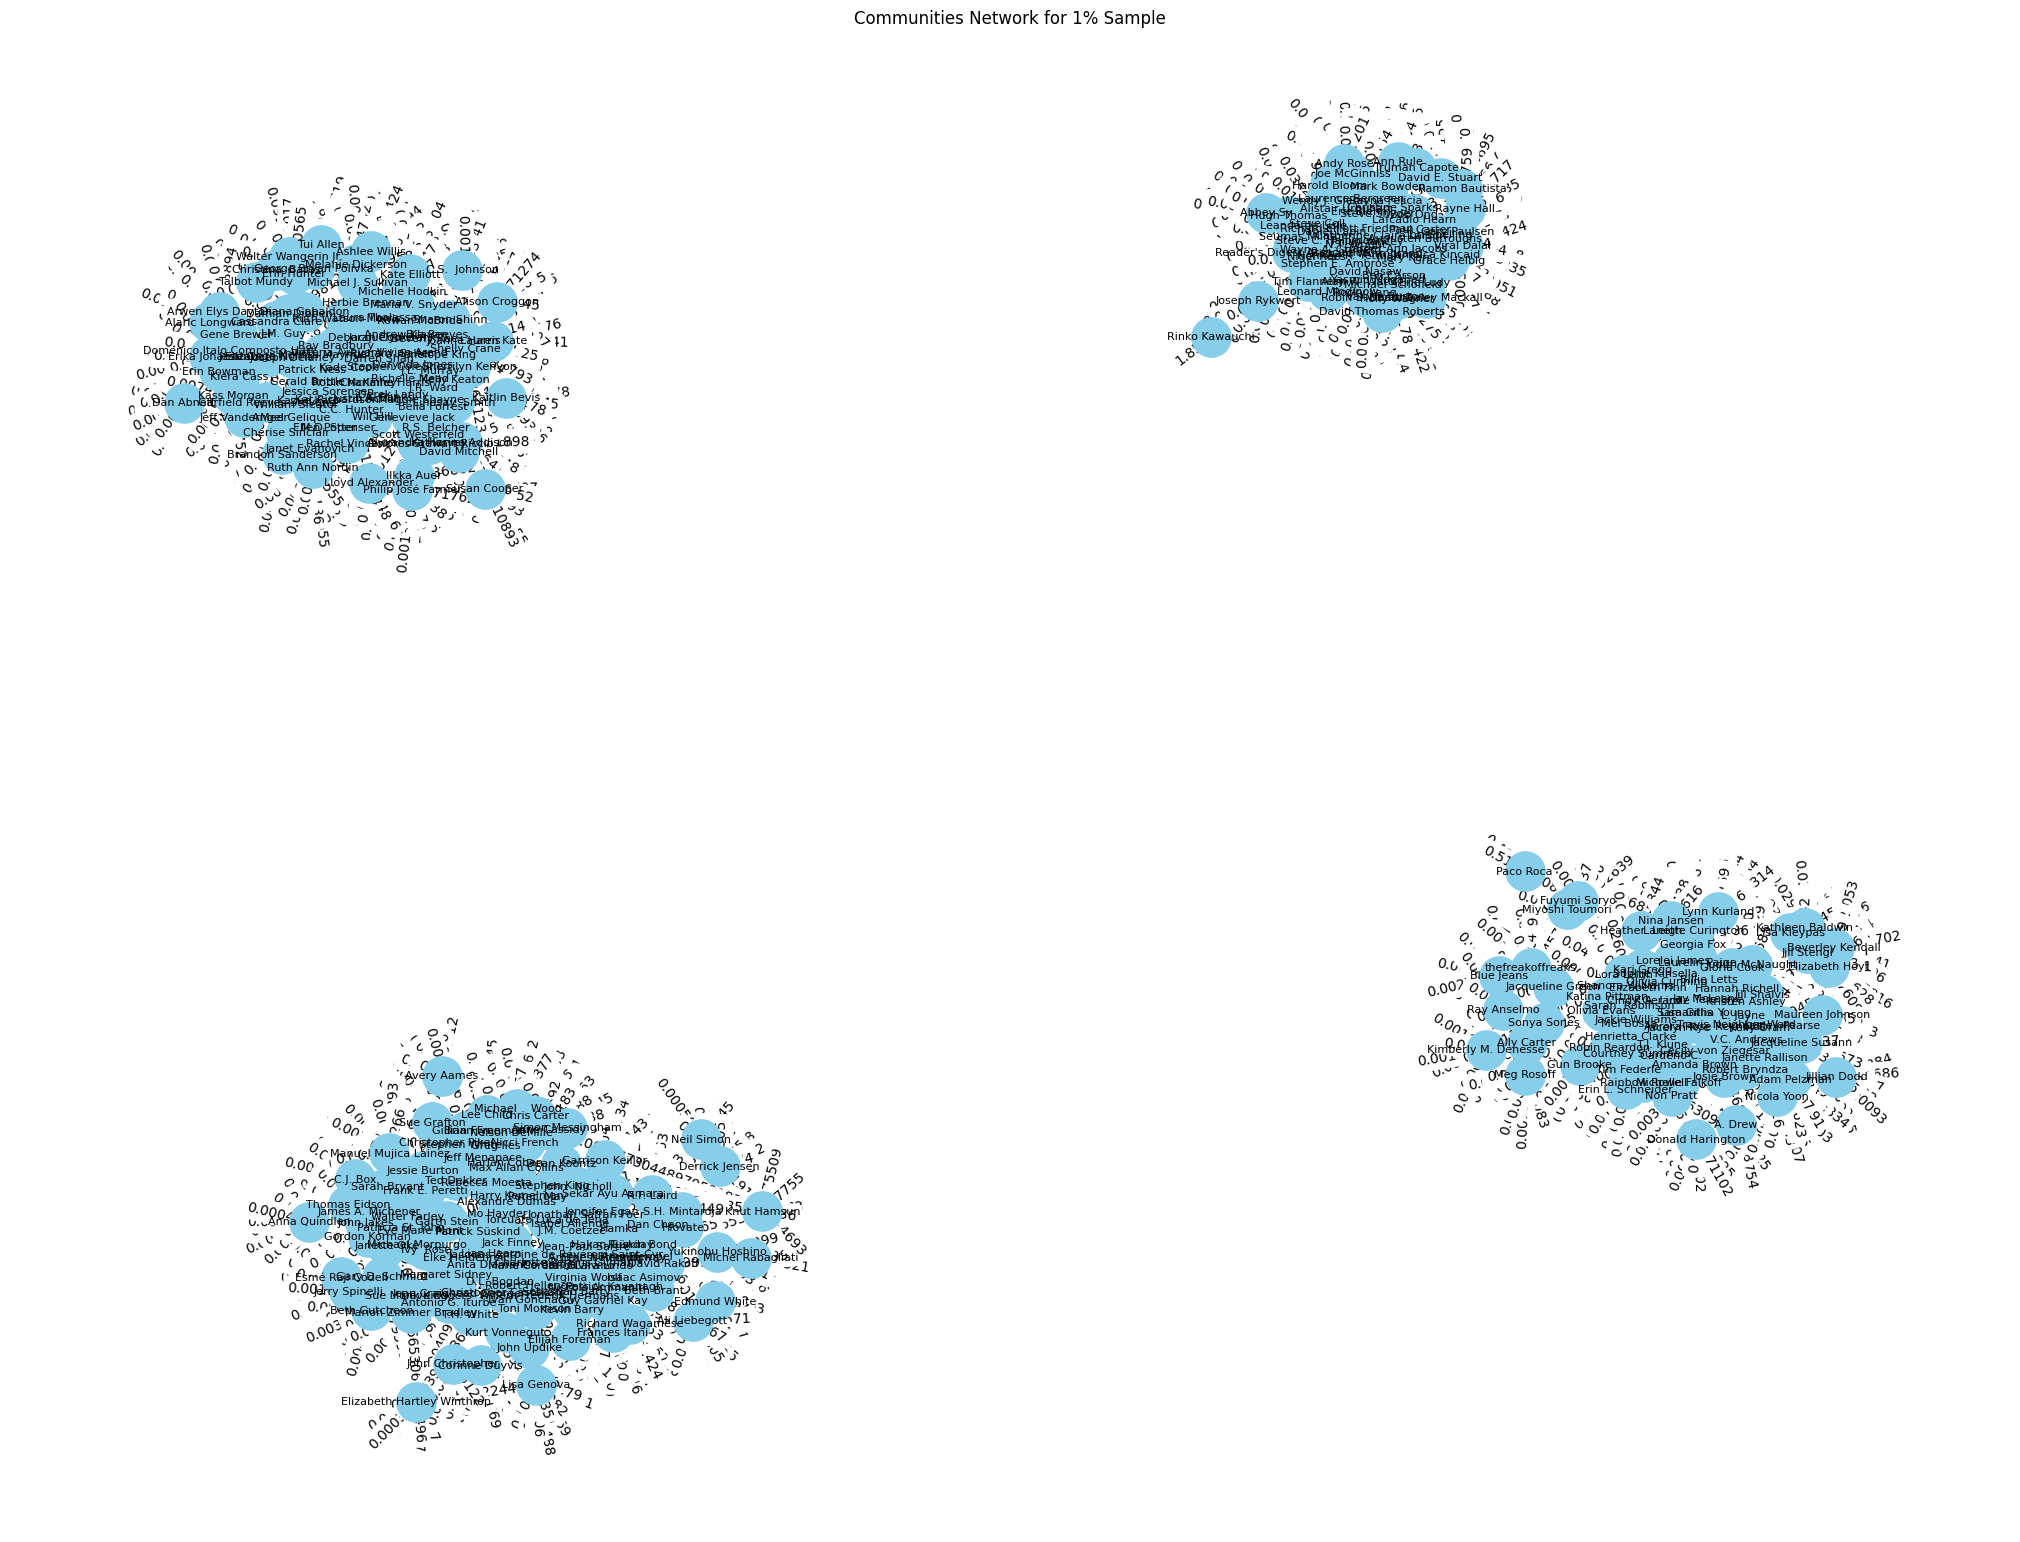

In [69]:
# Create the communities Network excluding the inter-community edges
C1 = nx.Graph()
C1.add_nodes_from([node for community in sample_louvain_author_communities for node in community])
C1.add_edges_from([(a, b, {'weight': edge_weights.get((a, b), 0.0)}) for a in C1.nodes for b in C1.nodes if a != b and edge_weights.get((a, b), 0.0) != 0.0 and (not np.isnan(hasCommunity(a,b)) or not np.isnan(hasCommunity(b,a)))])
# Visualize communities Network
pos = nx.spring_layout(C1)

# Set the size of the figure
plt.figure(figsize=(20, 15))  # Adjust the values (width, height) as needed
nx.draw(C1, pos, with_labels=True, font_size=8, node_color='skyblue', edge_color='gray', node_size=800, font_color='black')

# Display edge weights
edge_labels = nx.get_edge_attributes(C1, 'weight')
nx.draw_networkx_edge_labels(C1, pos, edge_labels=edge_labels)

plt.title("Communities Network for 1% Sample")
plt.show()